# U.S. Medical Insurance Costs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Scope of the project

This project is an analyses on the dataset U.S. Medical Insurance Costs. This dataset consists of a brief description of people in the U.S. and their medical charges. The goal of this project is to get a better understanding of the dataset and see if there are any interesting correlations. To achieve this, the following 9 questions will be answered:

1. What is the structure of the dataset using .info() and .describe()?
2. What is the average BMI?
3. What is the distribution of smokers between regions?
4. How does having children impact the charges?
5. Are men or women more likely to be smokers? (Using a contingency table)
6. Does having children increase your BMI?
7. Is there a difference in charges per region? Using a boxplot comparison for visualisation.
8. What is the age spread among male and female in this dataset like? Using an overlapping histogram.
9. Can the charges be predicted using a machine learning model?


In [3]:
insurance = pd.read_csv('insurance.csv')
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 1 Structure of the dataset 

In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We can see that there are 7 columns in total in this dataset. From this 7 columns, two have float datatypes, two have integer datatypes and three columns are an object datatype. Also there seem to be no missing data and the dataset consists of 1338 observations. 

In [5]:
insurance.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Looking at the summary statistics we can conclude, among other things, the following:

1. We can see that this dataset consists of people aged 18 to 64, looking at the age column
2. There seem to be slightly more male participants, although this difference is minimal. 
3. The BMI column does not seem to have extreme outliers. 
4. The dataset consists of people having no children to 5 at max. 
5. The smoker column is a binary variable and most people do not smoke. 
6. There are 4 regions from which southeast is the most prevalent in this dataset. 
7. The charges range from 1121 dollar to 63.770 dollar.

### 2 What is the average BMI?
Within the initial inspectation of this dataset, we can already see that the mean of the BMI is 30.663397. But for the sake of this subgoal we will also retrieve it using another line of python code, which only returns the average BMI.

In [6]:
average_bmi = np.round(insurance.bmi.mean())
print("The average bmi for the 1338 people in this dataset is {}".format(average_bmi))

The average bmi for the 1338 people in this dataset is 31.0


This average BMI is actually higher than I suspected at first. A BMI of 31.0 falls within the obesity range according to the Centers for Disease Control and Prevention (https://www.cdc.gov/obesity/basics/adult-defining.html). This actually makes me wonder if the data is skewed in some sort of way, or that the people in the dataset actually are on average withing the obesity range. To explore this question I will make a histogram.

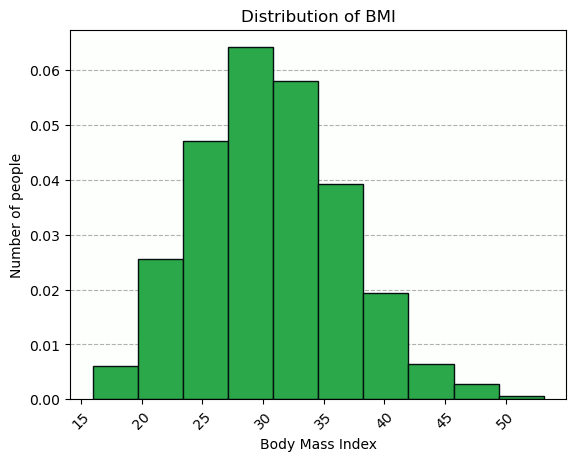

In [81]:
ax = plt.axes()
ax.set(facecolor='#FCFFFC')
ax.set_axisbelow(True)

plt.grid(axis='y', linestyle='--')
plt.hist(insurance.bmi, color='#2BA84A', edgecolor='#040F0F', histtype='bar', density=True)
plt.xlabel('Body Mass Index')
plt.ylabel('Number of people')
plt.title('Distribution of BMI')
plt.xticks(rotation=45)
plt.show()


The distribution of BMI does not seem skewed. Thus we can conclude that 31.0 is a typical BMI for the population of this dataset.


### 3 What is the distribution of smokers between Regions?
The smoker column from the .describe() function gives us some information about the top region, the number of regions and the count of observations of regions. It does not give us a clear insight in a comparison between the regions, when it comes to the number of smokers.

We will use pandas groupby function to get more insight in how the different regions compare against eachother. Additionally, we will make a barplot to visualize the regions.

In [8]:
counts_per_region = insurance.groupby('region').smoker.count().reset_index()
counts_per_region

,region,smoker
0,northeast,324
1,northwest,325
2,southeast,364
3,southwest,325


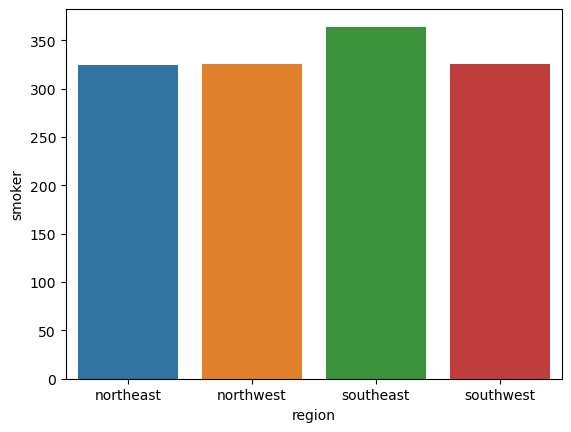

In [9]:
sns.barplot(data=counts_per_region, x='region', y='smoker')
plt.show()
plt.close()

As we can clearly see from the counts_per_region table as well as the barplot, there is not much difference between the 4 regions when it comes to the number of people who smoke. However, southeast is the only region with its head above the other regions.

### 4 How does having children impact the charges?
For the fourth question in this analysis we are going to look at two quantitative variables. To find out if there is an associations between having children and the amount of the respondents pay, we will construct a scatterplot and find out the coveriance and the Pearson Correlation. 


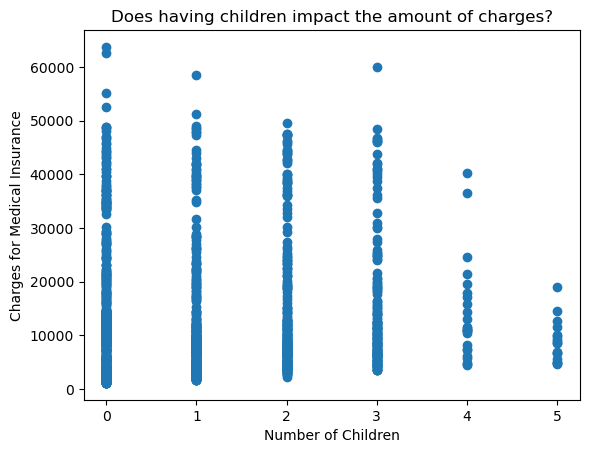

In [10]:
plt.scatter(x=insurance.children, y=insurance.charges)
plt.xlabel('Number of Children')
plt.ylabel('Charges for Medical Insurance')
plt.title('Does having children impact the amount of charges?')
plt.show()
plt.close()

Looking at the scatterplot, the charges seem to go down the more children you have. Let's confirm our assumption by calculation the covariance and the Pearson correlation.

In [11]:
cov_children_charges = np.cov(insurance.children, insurance.charges)
cov_children_charges

array([[1.45321275e+00, 9.92674197e+02],
       [9.92674197e+02, 1.46652372e+08]])

In [12]:
corr_children_charges, p = pearsonr(insurance.children, insurance.charges)
corr_children_charges

0.06799822684790481

Generally, a correlation of +-0.3 or higher indicates linear association and a correlation of +- 0.6 or higher indicates a strong linear association. 0.06 Does not indicate a correlation whatsoever.

### 5 Are men or women more likely to be smokers?
This question is very similar to question 3 regarding the number of smokers per region. Therefore we will again construct a barplot.

In [13]:
counts_per_sex = insurance.groupby('sex').smoker.count().reset_index()
counts_per_sex

,sex,smoker
0,female,662
1,male,676


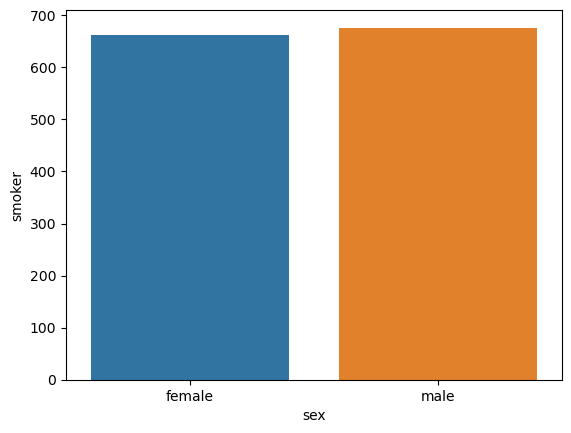

In [14]:
    sns.barplot(data=counts_per_sex, x='sex', y='smoker')
plt.show()
plt.close()

There is almost no difference between the amount of male vs female smokers!

### 6 Does having children increase your BMI?
This question is very similar to question 4 regarding the impact of having children on the amount of charges for your medical insurance. Therefore we will again construct a scatterplot and calculate the Pearson Correlation.

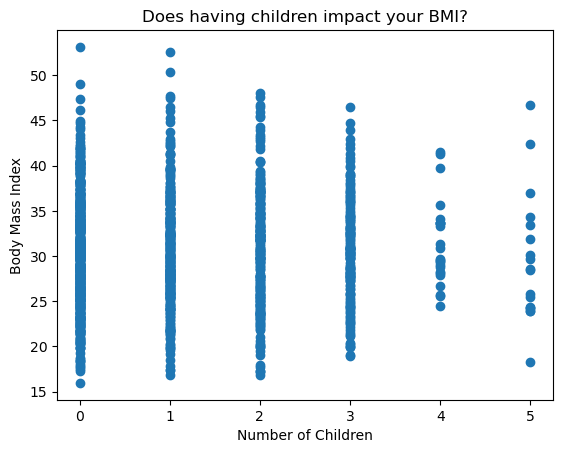

In [15]:
plt.scatter(x=insurance.children, y=insurance.bmi)
plt.xlabel('Number of Children')
plt.ylabel('Body Mass Index')
plt.title('Does having children impact your BMI?')
plt.show()
plt.close()

In [16]:
corr_children_bmi, p = pearsonr(insurance.children, insurance.bmi)
corr_children_bmi

0.012758900820673826

And again we see a very low Pearson Correlation, suggesting no association!

### 7 Is there a difference in charges per region?
Using a boxplot comparison we will have a visual insight in the difference in charges per region.

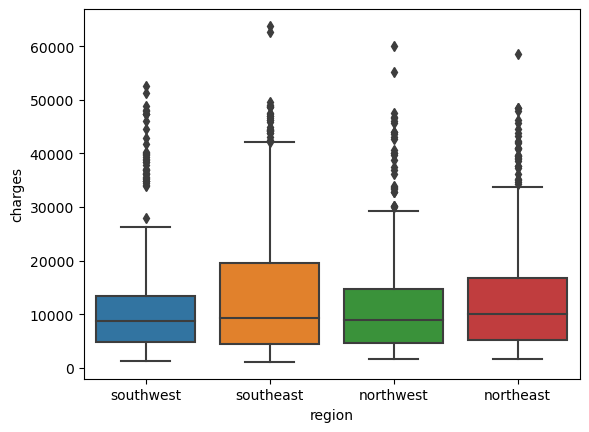

In [17]:
sns.boxplot(data=insurance, x='region', y='charges')
plt.show()
plt.close()

Although the median of most regions is pretty close, a clear difference in spread can be seen between southwest and southeast. With southeast having a greater spread upwards. 

### 8 What is the age spread among male and female in this dataset like? Using an overlapping histogram.

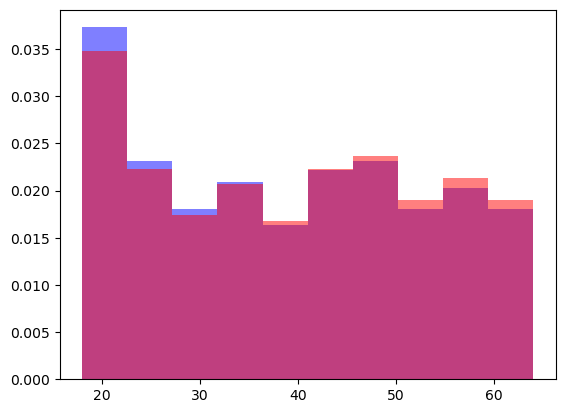

In [18]:
male_age = insurance.age[insurance.sex == 'male']
female_age = insurance.age[insurance.sex == 'female']

plt.hist(male_age, color='blue', label='Male Age Spread', density=True, alpha=0.5)
plt.hist(female_age, color='red', label='Female Age Spread', density=True, alpha=0.5)
plt.show()
plt.close()

Male and female spread is almost identical!

### 9 Can the charges be predicted using a machine learning model?
In this final question we will use all of the features in the dataset to make a machine learning model to predict the charges. Since there are several features (sex, age, children, bmi, smoker & region) we'd like to use a Multiple Linear Regression Model

In [19]:
insurance.sex = insurance.sex.apply(lambda string: 1 if string == 'female' else 0)
insurance.smoker = insurance.smoker.apply(lambda string: 1 if string == 'yes' else 0)
insurancedummies = pd.get_dummies(data=insurance, columns=['region'])

insurancedummies

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [20]:
x = insurancedummies[['sex', 'age', 'children', 'bmi', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]
y = insurancedummies['charges']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size=0.2)

In [26]:
mlr_charges = LinearRegression()
mlr_charges.fit(x_train.values, y_train)

y_predicted = mlr_charges.predict(x_test.values)
print(mlr_charges.coef_)
print(mlr_charges.intercept_)

[  163.82496328   257.65016608   425.07809659   347.68926192
 24050.77809803   574.35443115   388.89687242  -640.9882728
  -322.26303077]
-12832.805630627423


In [23]:
lars_charges = [[0, 24, 0, 20.1, 0, 0, 0, 0, 0]]
predict = mlr_charges.predict(lars_charges)

print("Predicted charges for me: $%.2f, versus the mean $%.2f and median $%.2f charges" % (predict, insurance.charges.mean(), insurance.charges.median()))

Predicted charges for me: $339.35, versus the mean $13270.42 and median $9382.03 charges


#### Does someone with all median values get a median predicted charges?
In categories, age, children and bmi so:
sex = 1 and 0
smoker = 1 and 0

In [24]:
age_med = insurance.age.median()
child_med = insurance.children.median()
bmi_med = insurance.bmi.median()

female_smoker = [[1, age_med, child_med, bmi_med, 1, 0, 0, 0, 0]]
male_smoker = [[0, age_med, child_med, bmi_med, 1, 0, 0, 0, 0]]
female = [[1, age_med, child_med, bmi_med, 0, 0, 0, 0, 0]]
male = [[0, age_med, child_med, bmi_med, 0, 0, 0, 0, 0]]

female_smoker_pred = mlr_charges.predict(female_smoker)
male_smoker_pred = mlr_charges.predict(male_smoker)
female_pred = mlr_charges.predict(female)
male_pred = mlr_charges.predict(male)

print("Predicted charges for female smoker: $%.2f, versus the median $%.2f charges" % (female_smoker_pred, insurance.charges.median()))
print("Predicted charges for male smoker: $%.2f, versus the median $%.2f charges" % (male_smoker_pred, insurance.charges.median()))
print("Predicted charges for typical female: $%.2f, versus the median $%.2f charges" % (female_pred, insurance.charges.median()))
print("Predicted charges for typical male: $%.2f, versus the median $%.2f charges" % (male_pred, insurance.charges.median()))

print("don't smoke!")

Predicted charges for female smoker: $32424.99, versus the median $9382.03 charges
Predicted charges for male smoker: $32261.16, versus the median $9382.03 charges
Predicted charges for typical female: $8374.21, versus the median $9382.03 charges
Predicted charges for typical male: $8210.38, versus the median $9382.03 charges
don't smoke!


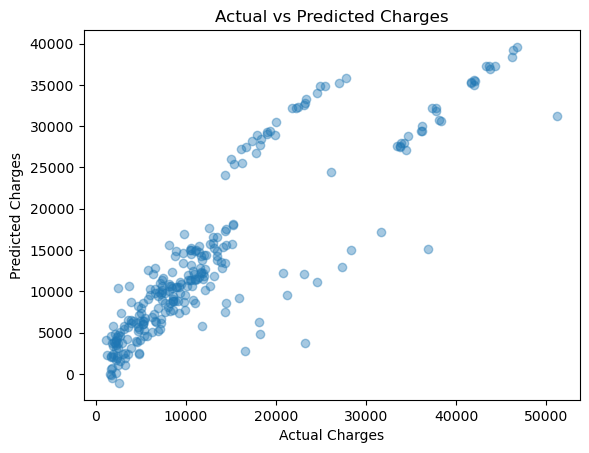

In [25]:
plt.scatter(y_test, y_predicted, alpha = 0.4)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()